### Задача 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]
col_name = ['x1', 'x2', 'x3', 'x4']
df = pd.DataFrame(X, columns=col_name)
df

,x1,x2,x3,x4
0,1.224013,2.308685,3.036364,2.692872
1,-0.187573,1.303374,5.120930,3.463632
2,-0.810945,1.824634,5.796865,1.861594
3,0.751290,2.673921,3.655298,1.667461
4,0.009724,1.973673,2.505943,1.697552
5,-0.629726,0.777508,2.841240,4.544106
6,2.295362,1.812067,1.950262,1.518746
7,0.092042,2.269714,7.477087,2.610812
8,2.392528,3.175640,3.614206,5.107734
9,0.549838,2.879887,1.657528,1.596360


Формируем матрицы признаков с единичными столбцами слева, чтобы в циклу рассчитать сразу все значения R2

In [2]:
ones = np.ones((df[['x1', 'x2']].values.shape[0], 1))
list_params = [np.hstack((ones, df[['x1', 'x2']].values)), np.hstack((ones, df[['x1', 'x3']].values)),
               np.hstack((ones, df[['x1', 'x4']].values)), np.hstack((ones, df[['x2', 'x3']].values)),
               np.hstack((ones, df[['x2', 'x4']].values)), np.hstack((ones, df[['x3', 'x4']].values))]

Обучаем модель линейной регрессии, находим предсказанные значения и значения R2

In [3]:
from sklearn.metrics import r2_score

res =[]
for x in list_params:
    model2 = LinearRegression().fit(x, y)
    z = model2.predict(x)
    res.append(r2_score(y, z))
res



[0.18113594742585226,
 0.7634246238793153,
 0.4532966783144077,
 0.547948273403901,
 0.6062055761129932,
 0.6224419876505323]

Наилучшее значение, и его индекс в списке результатов.

In [4]:
max(res), res.index(max(res))

(0.7634246238793153, 1)

In [5]:
from scipy import stats
n = x.shape[0]
m = 2
k1 = m
k2 = n - m

k1, k2

(2, 8)

Критическая область $$\Omega_\alpha = \left( 4.46, \infty \right)$$

In [6]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.458970107524511

Значение попало в критическую область, значит уравнение является значимым

In [7]:
R = res[1]
F = (R / k1) / ((1 - R) / k2)
F

12.907930426197321

__Задача 2__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

In [8]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]).reshape((-1, 1))
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [9]:
model = LinearRegression()
model.fit(x, y)
model.intercept_, model.coef_

(3.6400108599141863, array([0.        , 0.70753914, 1.04851745]))

2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

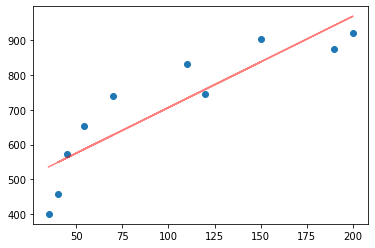

In [10]:
import matplotlib.pyplot as plt
salary1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b1 = (np.mean(salary1 * scoring1) - np.mean(salary1) * np.mean(scoring1)) / (np.mean(salary1 ** 2) - np.mean(salary1) ** 2)
b0 = np.mean(scoring1) - b1 * np.mean(salary1)
ox = salary1
oy = b0 + b1 * ox

plt.scatter(salary1, scoring1)
plt.plot(ox, oy, color='red', alpha=0.5)


3. Посчитайте коэффициент детерминации.

In [11]:
z = model.predict(x)
r2_score(y, z)

0.6224419876505323

4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

In [12]:
n = salary.shape[0]
m = 1
k1 = m
k2 = n - m

k1, k2

(1, 9)

In [13]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.117355029199227

In [14]:
R = r2_score(y, z)
F = (R / k1) / ((1 - R) / k2)
F


14.837396388424672